# Projet 2 : Analyse des données de systèmes éducatifs
Dabidin Keshika

## Table des matières 

1. Contexte
2. Objectifs
3. Préanalyse des données
4. Nettoyage et filtrage des données
5. Sélection des pays 
6. Évolution des potentiels pays sélectionnés
7. Conclusion



## Contexte
Dans le domaine de la **EdTech**(Education Technology), nous sommes dans une start'up nomée **Academy**. 

*Academy* propose des formations de **niveau lycée** et de **niveau université** en ligne et cherche à s'étendre à l'international. 

## Objectifs 

- Quels sont les pays avec un fort potentiel de clients pour nos services ?

- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ? 

- Dans quels pays l’entreprise doit-elle opérer en priorité ? 

## Données 
Les données ont été téléchargées de la Banque mondiale : "[Education Statistics](https://datacatalog.worldbank.org/search/dataset/0038480)"




# 1. Préanalyse des données

## 1. (a). Validation de la qualité du jeu de données 

#### (i) Lecture des données : 

In [27]:
# Importation des librairies utiles pour l'analyse et la visualisation des données

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
#Lecture des données

EdStatsCountry=pd.read_csv("C:/Users/kherm/Documents/Openclassrooms/projet 2/EdStatsCountry.csv")
EdStatsSeries=pd.read_csv("C:/Users/kherm/Documents/Openclassrooms/projet 2/EdStatsSeries.csv")
EdStatsData=pd.read_csv("C:/Users/kherm/Documents/Openclassrooms/projet 2/EdStatsData.csv",sep=',')
EdStatsCountrySeries=pd.read_csv("C:/Users/kherm/Documents/Openclassrooms/projet 2/EdStatsCountry-Series.csv")
EdStatsFootnote=pd.read_csv("C:/Users/kherm/Documents/Openclassrooms/projet 2/EdStatsFootNote.csv")

Les méthodes .head(), .tail() et .info() permettent d'avoir un aperçu global du contenu des fichiers. 

##### Observations :  
- Les fichiers *'EdStatsCountrySeries.csv'* et *'EdStatsFootnote.csv'* ne sont pas utiles pour cette analyse. 
- Les observations concernant les fichiers *'EdStatsCountry.csv','EdStatsSeries.csv','EdStatsData.csv'* seront présentées dans la *partie 1.(b).*


#### (ii) Création d'un tableau résumant les données : 

In [29]:
# Création du tableau résumé
tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],
                                 index = ["EdStatsCountry.csv", 
                                          "EdStatsSeries.csv", 
                                          "EdStatsData.csv"])

# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
tableau_resume["Nombre lignes"] = [
    len(EdStatsCountry.index),
    len(EdStatsSeries.index),
    len(EdStatsData.index)
]

# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
tableau_resume["Nombre colonnes"] = [
    len(EdStatsCountry.columns),
    len(EdStatsSeries.columns),
    len(EdStatsData.columns)
]

# Fonction pour calculer le pourcentage de remplissage
def pourcentage(x):
    return "{0:.01f}%".format(x * 100)

# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
tableau_resume["Taux remplissage moyen"] = [
    pourcentage(EdStatsCountry.notna().mean().mean()),
    pourcentage(EdStatsSeries.notna().mean().mean()),
    pourcentage(EdStatsData.notna().mean().mean()),
]

# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
tableau_resume["Doublons"] = [
    EdStatsCountry.duplicated(subset=["Country Code"]).sum(),
    EdStatsSeries.duplicated(subset=["Indicator Name"]).sum(),
    EdStatsData.duplicated(subset=["Country Code", "Indicator Name"]).sum()
]

tableau_resume

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
EdStatsCountry.csv,241,32,69.5%,0
EdStatsSeries.csv,3665,21,28.3%,0
EdStatsData.csv,886930,70,13.9%,0


##### Observations :  
- Il n'y a pas de doublons dans le jeu de données. 
- Le taux de remplissage pour chaque fichier n'est pas à 100%. Il y a des données manquantes. Il faudra cibler où sont les données manquantes pour les supprimer par la suite. 

## 1.(b).  Critères de sélection à retenir pour filtrer les données 

***Quelles sont les variables permettant de quantifier un pays en vue d'un développement commercial ?***

Comme cité ci-dessous, la méthode .info()  est utile pour visualiser les informations contenus dans les fichiers. Voici les observations effectuées sur chacun des fichiers : 

1. ***'EdStatsCountry.csv'***: 

Ce fichier contient des données sur  notamment la population et la situation économique des différents pays. Les paramètres qui pourraient être intéressants à cibler sont : 
   - une population suffisante en posant un seuil minimal par ex. 1 000 000 
  
2. ***'EdStatsSeries.csv' :*** 

Ce fichier est utile pour comprendre et choisir les différents indicateurs qui seront par la suite utilisées dans l'analyse. Dans un premier temps, nous pouvons nous intéresser aux critères suivants : 

- **Déploiement internet :**

*IT.CMP.PCMP.P2* : pourcentage de personnes ayant un accès à un ordinateur personnel *(ligne 610)*

*IT.NET.USER.P2* : pourcentage d'utilisateurs d'internet *(ligne 611)*

- **Population d'étudiants potentiels :** 

***(a) Age entre 15 à 24 ans*** : 

*SP.POP.TOTL*: population totale à la mi-année *(ligne 2590)*

*SP.POP.1524.TO.UN* : population totale de la tranche 15-24 ans *(ligne 2506)*


***(b) Niveau d'éducation*** : 

*SP.SEC.TOTL.IN* : population totale ayant l'âge d'entrer en éducation secondaire (secondary education) *(ligne 2608)*

*SP.SEC.UTOT.IN* : population totale ayant l'âge d'entrer en éducation secondaire élevée (upper secondary education *(ligne 2611)*

*SP.TER.TOTL.IN* : population totale ayant l'âge d'entrer en éducation tertiaire (tertiary ed.) *(ligne 2614)*

*UIS.EA.3.AG25T99* : pourcentage de la population à 25+ ayant complété l'éducation secondaire *(ligne 2863)*


**(c) Situation économique du pays :** 

*NY.GDP.PCAP.PP.CD* : PIB par habitant (PPP - Current International Dollar) *(ligne 1664)*



**(d) Croissance de la population du pays :** 

Afin d'étudier l'évolution potentielle des clients, il est intéresssant de retenir un indicateur qui nous renseigne sur l'évolution de la population. 

*SP.POP.GROW* : taux de croissance annuelle de la population en % *(ligne 2589)*


3. **'EdStatsData.csv' :** 

Ce fichier donne des valeurs et l’évolution de nombreux indicateurs pour tous les pays ou certains groupes de pays.On pourra s'intéresser aux données récentes.


**En résumé :** 

*Nous sélectionnerons les pays qui  ont en priorité un bon déploiement d'internet, qui ont des revenus comparables à la France et qui ont suffisament de population jeune (entre 15 à 24 ans) avec un bon niveau d'éducation. Pour étudier l'évolution des clients potentiels nous nous intéresserons au taux de croissance de la population.*


### Création de la liste des indicateurs retenus

In [30]:
indicators=['IT.CMP.PCMP.P2','IT.NET.USER.P2','SP.POP.TOTL','SP.POP.1524.TO.UN','SP.SEC.TOTL.IN','SP.SEC.UTOT.IN','SP.TER.TOTL.IN','UIS.EA.3.AG25T99','NY.GDP.PCAP.PP.CD','SP.POP.GROW']

# Données du fichier EdStatsData.csv avec les indicateurs sélectionnés pour effectuer des opérations
data=EdStatsData[EdStatsData['Indicator Code'].isin(indicators)]

In [31]:
#Création d'une copie de data pour effectuer des modifications
data_copy=data.copy()
data_copy=data_copy.drop(columns=['Indicator Name'])
data_copy.head()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1247,Arab World,ARB,NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,Arab World,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,Arab World,ARB,SP.POP.GROW,2.767219e+00,2.694623e+00,2.658899e+00,2.687857e+00,2.795847e+00,2.948191e+00,3.106885e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2323,Arab World,ARB,SP.SEC.TOTL.IN,1.887675e+07,1.947298e+07,1.994125e+07,2.042827e+07,2.096031e+07,2.155374e+07,2.219776e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Analyse de la qualité des données et nettoyage des données

Dans cette partie, nous allons effectuer le nettoyage des données avec les étapes suivantes : 
1. Supprimer les données futures ou non pertinentes pour cette étude.
2. Supprimer les pays avec une population peu élevée.
3. Analyser le taux de remplissage par indicateurs et par pays.
4. Filtrer les données en fonction des indicateurs retenus.


## 2.(a). Conservation des données pertinentes dans le temps

### Suppression des données vides
La méthode .drop.na() permet de supprimer les données vides. 

In [32]:
data_copy.dropna(axis=1, how="all", inplace=True)
data_copy.head()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1247,Arab World,ARB,NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.300436e+04,1.373891e+04,1.385056e+04,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN,NaN
1375,Arab World,ARB,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
2084,Arab World,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,Arab World,ARB,SP.POP.GROW,2.767219e+00,2.694623e+00,2.658899e+00,2.687857e+00,2.795847e+00,2.948191e+00,3.106885e+00,...,2.386344e+00,2.381136e+00,2.323576e+00,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN,NaN
2323,Arab World,ARB,SP.SEC.TOTL.IN,1.887675e+07,1.947298e+07,1.994125e+07,2.042827e+07,2.096031e+07,2.155374e+07,2.219776e+07,...,4.404203e+07,4.428236e+07,4.425107e+07,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN,NaN


### Taux de remplissage et filtrage des données en fonction des années

On cherche à connaïtre le taux de remplissage de tous les indicateurs sélectionnés par année qu'on affichera sur un graphique. 

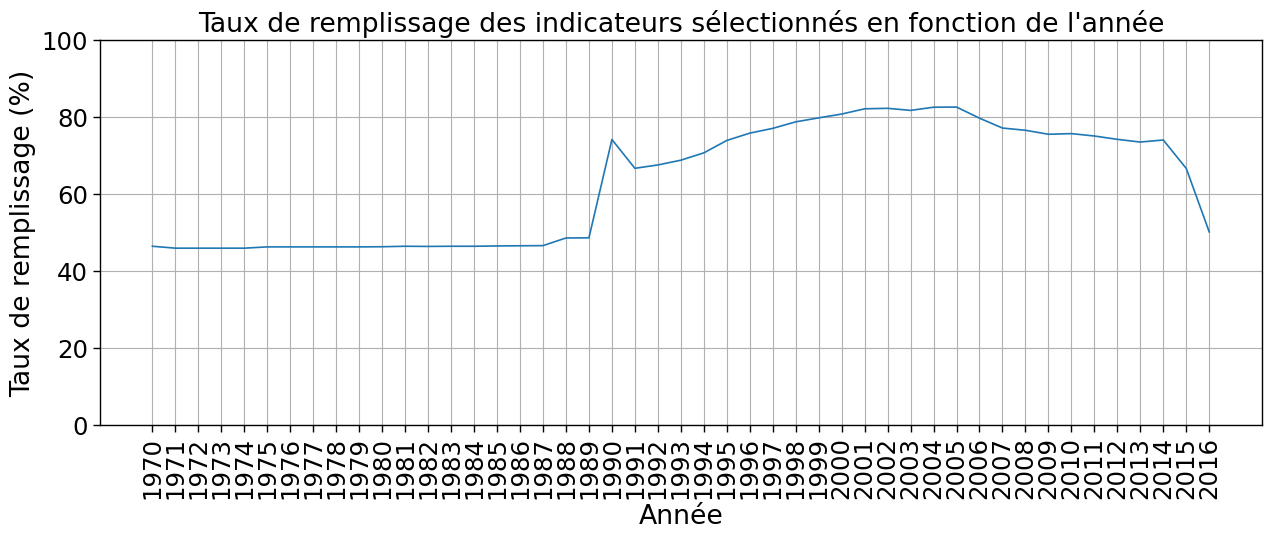

In [33]:
# Calcul du nombre d'indicateurs total par année 
annee_indicateurs=data_copy.drop(columns=['Country Code','Indicator Code','Country Name']).notnull().sum().to_frame()

#Calcul du nombre maximal d'indicateurs possibles avec tous les pays représentés 
max_indicateurs=pd.notnull(data_copy['Indicator Code']).sum()

# Calcul du taux de remplissage par année 
taux_remplissage_annee=(annee_indicateurs/max_indicateurs)*100

taux_remplissage_annee
#Affichage du graphique 
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.ylim(ymin=0, ymax=100)
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.title("Taux de remplissage des indicateurs sélectionnés en fonction de l'année")
plt.grid()
plt.plot(annee_indicateurs.index,taux_remplissage_annee[0])

##### Observations : 

1. Les données **après 2016** ont été supprimées car les valeurs des **indicateurs sont vides**. 
2. Les données **avant 1990** sont environ à **40% de remplissage**. Nous retiendrons donc uniquement les données récentes à partir de l'an **2010 à 2015** avec un taux de remplissage **supérieur à 60%**. 


### On peut maintenant filtrer les données en imposant un seuil minimal et maximal en année. 

In [34]:
#Copie des données avant le filtrage 
data_annee_avant_filtrage=data_copy.copy()

# Colonnes à garder avec les années 2010 à 2015
liste_annee=['Country Name','Country Code','Indicator Code','2010','2011','2012','2013','2014','2015']
data_apres_filtrage_annee=data_annee_avant_filtrage[[c for c in data_annee_avant_filtrage.columns if c in liste_annee]]
data_apres_filtrage_annee

,Country Name,Country Code,Indicator Code,2010,2011,2012,2013,2014,2015
1247,Arab World,ARB,NY.GDP.PCAP.PP.CD,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN
1375,Arab World,ARB,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2084,Arab World,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN
2307,Arab World,ARB,SP.POP.GROW,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN
2323,Arab World,ARB,SP.SEC.TOTL.IN,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN
...,...,...,...,...,...,...,...,...,...
885591,Zimbabwe,ZWE,SP.TER.TOTL.IN,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1604698.0,1607620.0
885597,Zimbabwe,ZWE,SP.SEC.UTOT.IN,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1331677.0,1342035.0
885747,Zimbabwe,ZWE,SP.POP.1524.TO.UN,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3354236.0,3333716.0
885798,Zimbabwe,ZWE,SP.POP.TOTL,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,15411675.0,15777451.0


## 2.(b). Supression des pays avec une population peu élevée

In [35]:
# Copie des données filtrées par année
data_avant_filtrage_pays= data_apres_filtrage_annee.copy()

# Récupération des données triées par population 
population_pays = data_avant_filtrage_pays[data_avant_filtrage_pays["Indicator Code"] == "SP.POP.TOTL"]
population_pays.reset_index(inplace=True)
population_pays.set_index("Country Code", inplace=True)

# Calcul de la population moyenne pour chaque pays
population_pays = population_pays.mean(axis=1).to_frame()
population_pays.columns = ["Population"]

# Filtrage avec un seuil de population minimale de 1 000 000 de personnes
MIN_POPULATION=1000000
## On va enregistrer les codes des grands pays qu'on conserve
grands_pays_id= population_pays[population_pays["Population"] >= MIN_POPULATION].index.values

# Données filtrées par pays
data_pays= data_apres_filtrage_annee[data_apres_filtrage_annee["Country Code"].isin(grands_pays_id)]
data_pays

,Country Name,Country Code,Indicator Code,2010,2011,2012,2013,2014,2015
1247,Arab World,ARB,NY.GDP.PCAP.PP.CD,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN
1375,Arab World,ARB,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2084,Arab World,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN
2307,Arab World,ARB,SP.POP.GROW,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN
2323,Arab World,ARB,SP.SEC.TOTL.IN,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN
...,...,...,...,...,...,...,...,...,...
885591,Zimbabwe,ZWE,SP.TER.TOTL.IN,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1604698.0,1607620.0
885597,Zimbabwe,ZWE,SP.SEC.UTOT.IN,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1331677.0,1342035.0
885747,Zimbabwe,ZWE,SP.POP.1524.TO.UN,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3354236.0,3333716.0
885798,Zimbabwe,ZWE,SP.POP.TOTL,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,15411675.0,15777451.0


## 2.(c). Taux de remplissage et filtrage des données en fonction des indicateurs sélectionnés


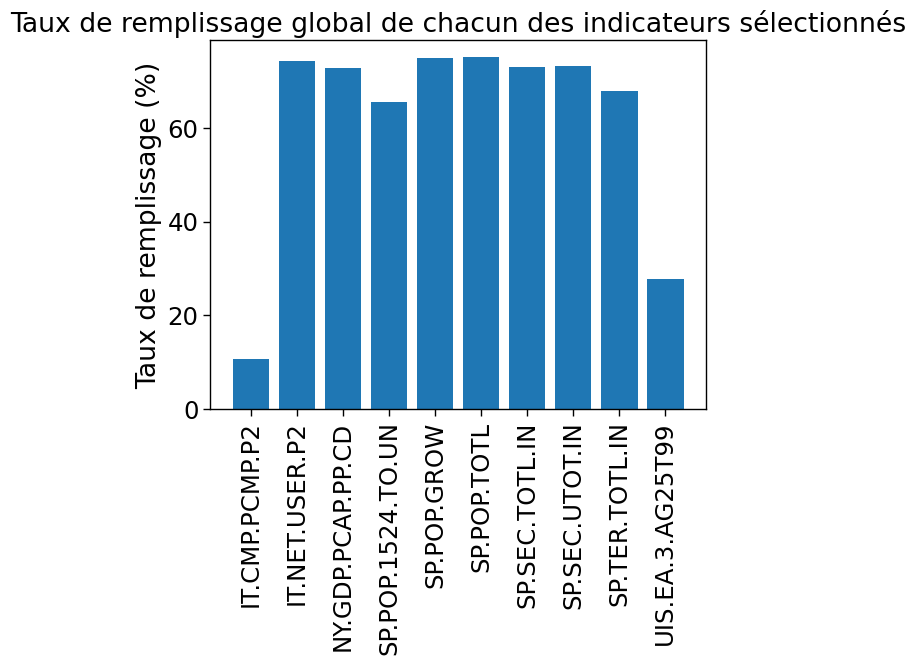

Indicator Code
IT.CMP.PCMP.P2       10.802834
IT.NET.USER.P2       74.262102
NY.GDP.PCAP.PP.CD    72.727273
SP.POP.1524.TO.UN    65.348288
SP.POP.GROW          74.852420
SP.POP.TOTL          74.911452
SP.SEC.TOTL.IN       72.845336
SP.SEC.UTOT.IN       73.140496
SP.TER.TOTL.IN       67.768595
UIS.EA.3.AG25T99     27.804014
dtype: float64

In [36]:
#Calcul de la somme des indicateurs remplis pour chaque année 
remplissage_indicateurs=data_pays.drop(columns=['Country Code']).set_index(['Indicator Code']).notnull().groupby('Indicator Code').sum()

#Calcul du taux de remplissage des indicateurs
taux_remplissage_indicateurs=remplissage_indicateurs/len(data_apres_filtrage_annee['Country Code'].unique()) * 100 # 242 est le nombre de pays

#Affichage du graphique du Taux de Remplissage en fonction des Indicateurs Sélectionnés
plt.title("Taux de remplissage global de chacun des indicateurs sélectionnés")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage (%)")
plt.bar(remplissage_indicateurs.index.values, taux_remplissage_indicateurs.mean(axis=1))
plt.savefig('indicateurs.png',bbox_inches='tight')
plt.show()
taux_remplissage_indicateurs.mean(axis=1)

#### *Observations* : 


- Les indicateurs **IT.NET.USER.P2, NY.GDP.PCAP.PP.CD, SP.POP.TOTL, SP.POP.1524.TO.UN, SP.POP.GROW, SP.SEC.UTOT.IN, SP.SEC.TOTL.IN, et SP.TER.TOTL.IN** ont un taux de remplissage suffisant et peuvent être retenus.

- **SP.POP.1524.TO.UN** sera utilisée comme filtre des pays alors que  **SP.SEC.UTOT.IN, SP.SEC.TOTL.IN et SP.TER.TOTL.IN** pourront être utilisés par la suite pour affiner la sélection. 

- Les indicateurs **IT.CMP.PCMP.P2**  et **UIS.EA.3.AG25T99** ne sont remplis qu'à 10,8% et 27,8% respectivement. Ces critères ne semblent pas pertinent à retenir pour la suite.

## 2.(d). Filtrage des données en fonction des indicateurs retenus

In [37]:
#Liste des indicateurs retenus
indicateurs_retenus=['IT.NET.USER.P2','SP.POP.TOTL','SP.POP.1524.TO.UN','SP.SEC.TOTL.IN','SP.POP.GROW','SP.SEC.UTOT.IN','SP.TER.TOTL.IN','NY.GDP.PCAP.PP.CD']

# Données du fichier avec les indicateurs retenus pour effectuer des opérations
data_indicateurs_retenus=data_pays[data_pays['Indicator Code'].isin(indicateurs_retenus)]
data_indicateurs_retenus

,Country Name,Country Code,Indicator Code,2010,2011,2012,2013,2014,2015
1247,Arab World,ARB,NY.GDP.PCAP.PP.CD,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN
1375,Arab World,ARB,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2307,Arab World,ARB,SP.POP.GROW,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN
2323,Arab World,ARB,SP.SEC.TOTL.IN,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN
2326,Arab World,ARB,SP.TER.TOTL.IN,3.519644e+07,3.540634e+07,3.548681e+07,3.545010e+07,35373556.0,NaN
...,...,...,...,...,...,...,...,...,...
885588,Zimbabwe,ZWE,SP.SEC.TOTL.IN,2.018022e+06,2.009047e+06,2.007007e+06,2.012733e+06,2026425.0,2047619.0
885591,Zimbabwe,ZWE,SP.TER.TOTL.IN,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1604698.0,1607620.0
885597,Zimbabwe,ZWE,SP.SEC.UTOT.IN,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1331677.0,1342035.0
885747,Zimbabwe,ZWE,SP.POP.1524.TO.UN,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3354236.0,3333716.0


# 3. Sélection des pays 

 
 Objectif : Proposer une liste de pays répondant aux critères de l'académie (entreprise). 
 
 Filtrage : 
  - à partir d'un seuil minimum défnis pour chaque variable, 
  - à partir d'un seuil de variables combinés.


## 3. (a)  Regroupement des indicateurs
Le but de cette partie est de créer un tableau qui contient une ligne par pays, et une colonne par indicateur avec la valeur finale conservée pour celui-ci.

In [38]:
# On va créer un tableau avec la valeur moyenne de chaque indicateur pour chaque pays
data=data_indicateurs_retenus

final_indicateurs = (
                    (data[data["Indicator Code"].isin(indicateurs_retenus)]
                            .groupby(["Country Code", "Indicator Code"])
                            .mean()
                           )
                           .mean(axis=1)
                           .to_frame()
                           .unstack(level=1)
                           .droplevel(0, axis=1))

final_indicateurs

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN
Country Code,,,,,,,,
AFG,5.935758,1788.887940,6.679801e+06,3.103683,3.123915e+07,4.358409e+06,2.035841e+06,2.819768e+06
AGO,7.316667,6239.908363,4.018651e+06,3.524201,2.557699e+07,3.248381e+06,1.526586e+06,2.168874e+06
ALB,54.868149,10623.779560,5.856280e+05,-0.268682,2.897253e+06,3.676903e+05,1.678492e+05,2.751482e+05
ARB,31.834459,15259.815662,NaN,2.108820,3.587756e+08,4.423419e+07,2.156913e+07,3.538265e+07
ARE,83.316665,63064.874408,7.128560e+05,2.956295,8.845841e+06,5.353278e+05,2.536933e+05,NaN
...,...,...,...,...,...,...,...,...
XKX,NaN,8668.662549,NaN,0.377253,1.803263e+06,NaN,NaN,NaN
YEM,18.556152,3808.375398,5.688936e+06,2.638750,2.525130e+07,3.639137e+06,1.802144e+06,2.765840e+06
ZAF,41.064853,12641.709688,9.899711e+06,1.507078,5.294766e+07,5.249812e+06,3.149010e+06,5.304702e+06


In [39]:
# Analyse des indicateurs - moyenne, médianne, écart-type
indicator_analysis = data.copy(deep=True)

indicator_analysis = (indicator_analysis
                           .drop(columns=["index", "Country Code"], errors="ignore")
                           .groupby(["Indicator Code","Country Name"]).mean())

# Calcul des moyennes, médiannes et écart-type
indicator_analysis_mean = indicator_analysis.mean(axis=1).to_frame()
indicator_analysis_std = indicator_analysis.std(axis=1).to_frame()
indicator_analysis_med = indicator_analysis.median(axis=1).to_frame()

indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_std, left_index=True, right_index=True)
indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_med, left_index=True, right_index=True)

indicator_analysis_mean.columns = ["Mean", "Std", "Median"]
indicator_analysis_mean

Mean           Std        Median
Indicator Code Country Name                                                
IT.NET.USER.P2 Afghanistan         5.935758e+00  1.509328e+00  5.677273e+00
               Albania             5.486815e+01  6.855289e+00  5.592798e+01
               Algeria             2.263333e+01  9.712192e+00  2.035000e+01
               Angola              7.316667e+00  3.886086e+00  7.700000e+00
               Arab World          3.183446e+01  4.490601e+00  3.186099e+01
...                                         ...           ...           ...
SP.TER.TOTL.IN West Bank and Gaza  4.581610e+05  3.351232e+04  4.608490e+05
               World               6.083727e+08  8.389584e+06  6.092101e+08
               Yemen, Rep.         2.765840e+06  1.413753e+05  2.781697e+06
               Zambia              1.426561e+06  5.384230e+04  1.423615e+06
               Zimbabwe            1.603491e+06  2.292519e+03  1.602450e+06

[1464 rows x 3 columns]

#### *Observations* : 
Les zones et les pays sont mélangés. On va essayer d'attribuer des pays pour chaque zone.

Pour cela, on choisira l'indicateur *SP.POP.1524.TO.UN* pour afficher les pays et les zones et filtrer les données par pays.

### Étude et regroupement des pays

In [40]:
countries=EdStatsCountry
pop_1524 = (final_indicateurs.merge(countries[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True))[["SP.POP.1524.TO.UN", "Short Name"]]


pop_1524[pop_1524["SP.POP.1524.TO.UN"].isnull()]


,SP.POP.1524.TO.UN,Short Name
Country Code,,
ARB,NaN,Arab World
EAP,NaN,East Asia & Pacific (developing only)
EAS,NaN,East Asia & Pacific (all income levels)
ECA,NaN,Europe & Central Asia (developing only)
ECS,NaN,Europe & Central Asia (all income levels)
EMU,NaN,Euro area
EUU,NaN,European Union
HIC,NaN,High income
HPC,NaN,Heavily indebted poor countries (HIPC)


On constate qu'à l'exception de Puerto Rico, les autres lignes ne sont pas des pays mais des regroupements de pays.

On effectuera le choix de supprimer Puerto Rico afin de réattribuer les pays aux zones dans l'étape suivante. 
#### Remise au propre des données 


In [41]:
# Création du tableau final de données
indicators_names = {
    'IT.NET.USER.P2': 'Utilisateurs Internet (%)', 
    'NY.GDP.PCAP.PP.CD': 'PIB par hab (PPA)', 
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SP.POP.GROW': 'Croissance pop. (%)',
    'Short Name': 'Country Name'
}

final_indicators_values = (final_indicateurs
                           .dropna(subset=["SP.POP.1524.TO.UN"])
                           .drop(columns=["SP.POP.TOTL", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", "SP.TER.TOTL.IN"], errors="ignore")
                           .merge(countries[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True)
                           .rename(columns=indicators_names))

final_indicators = indicators_names.keys()
final_indicators_values

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Country Name
Country Code,,,,,
AFG,5.935758,1788.887940,6.679801e+06,3.103683,Afghanistan
AGO,7.316667,6239.908363,4.018651e+06,3.524201,Angola
ALB,54.868149,10623.779560,5.856280e+05,-0.268682,Albania
ARE,83.316665,63064.874408,7.128560e+05,2.956295,United Arab Emirates
ARG,57.407177,19647.406305,6.873357e+06,1.036686,Argentina
...,...,...,...,...,...
VNM,37.586667,5186.028936,1.777147e+07,1.067158,Vietnam
YEM,18.556152,3808.375398,5.688936e+06,2.638750,Yemen
ZAF,41.064853,12641.709688,9.899711e+06,1.507078,South Africa


## 3.(b). Sélection des potentiels clients

On va maintenant sélectionner une première fois les pays qui seront les potentiels clients en établissant une liste de critères prioritaires. 
On choisira de mettre en priorité le critère de 'l'utilisation d'internet' pour choisir 40 pays potentiels. Ensuite, parmi les 40 pays, on choisira 20 pays qui ont un PIB par habitant suffisant. Finalement, parmi les 20 pays restants, on choisira 10 pays qui ont suffisament de jeunes agés de 15-24 ans. 

On considèra pour le premier tri que les pays avec un PIB suffisament élévé ont une population bien scolarisée, ce qui nous permettera de ne pas considérer les indicateurs de population inscrite en secondaire et en tertiaire. 

### Sélection des 40 premiers pays en fonction du taux d'utilisation d'internet

In [42]:
#Sélection des données
data_utilisateurs_internet=final_indicators_values.sort_values(by='Utilisateurs Internet (%)', ascending=False).groupby('Utilisateurs Internet (%)').head(40)
utilisateurs_internet=data_utilisateurs_internet.head(40)
utilisateurs_internet

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Country Name
Country Code,,,,,
NOR,94.948943,63430.013962,6.395098e+05,1.198043,Norway
DNK,92.956704,45982.723744,6.943373e+05,0.477098,Denmark
SWE,92.310629,45043.936854,1.191749e+06,0.874077,Sweden
NLD,92.057865,47515.330392,2.002537e+06,0.407879,Netherlands
GBR,88.552399,38781.846678,7.904708e+06,0.746455,United Kingdom
FIN,88.324486,40868.442189,6.497598e+05,0.433422,Finland
CHE,85.918681,58732.674071,9.617555e+05,1.120596,Switzerland
KOR,85.584096,32395.241261,6.566453e+06,0.567261,Korea
CAN,84.615000,42853.695321,4.452427e+06,1.065479,Canada


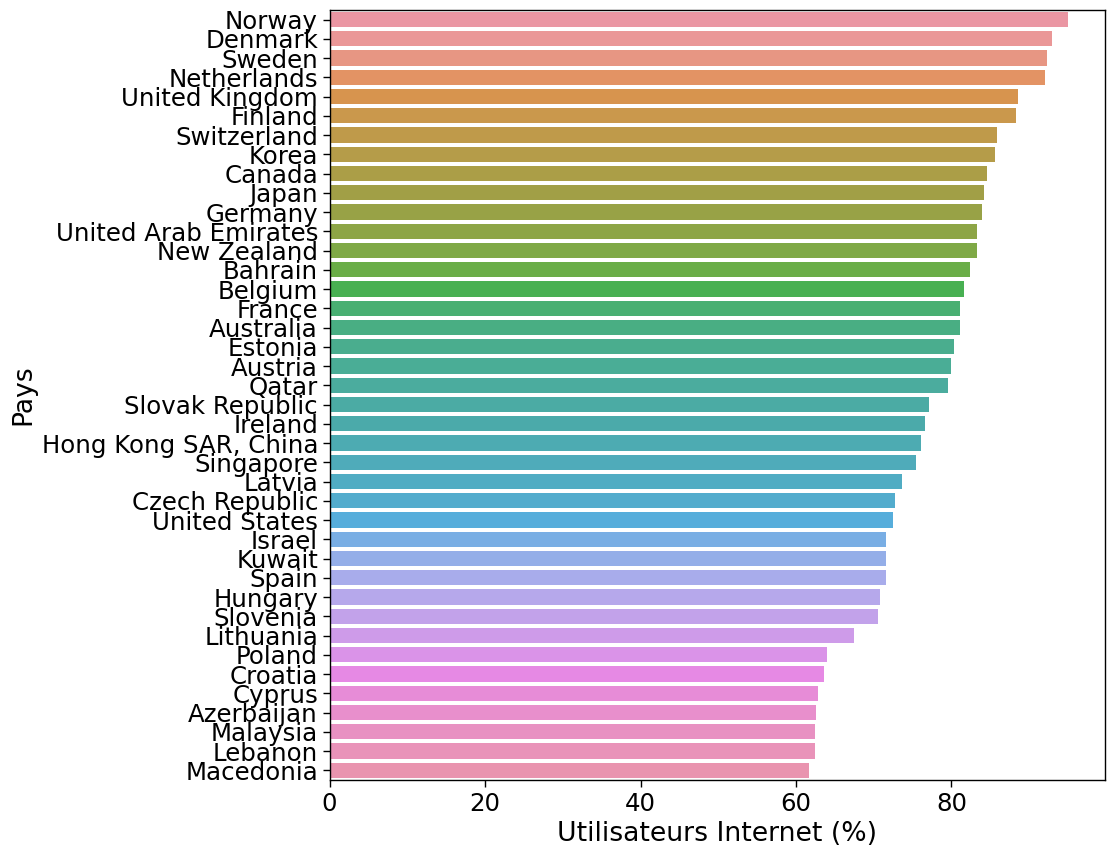

In [43]:
# Affichage du graphique
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = final_indicators_values.sort_values(by='Utilisateurs Internet (%)', ascending=False)['Utilisateurs Internet (%)'].head(40), y=final_indicators_values.sort_values(by='Utilisateurs Internet (%)', ascending=False)['Country Name'].head(40))
plt.title('', size=20)
plt.xlabel("Utilisateurs Internet (%)")
plt.ylabel('Pays')
plt.show()

Tous les 40 pays ont un taux d'utilisation d'internet suffisant pour faire partie de la suite du tri. 

### Sélection des 20 premiers pays avec un PIB suffisant

In [44]:
# Sélection PIB
data_pib=utilisateurs_internet.sort_values(by='PIB par hab (PPA)', ascending=False).groupby('PIB par hab (PPA)').head(20)
pib=data_pib.head(20)
pib

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Country Name
Country Code,,,,,
QAT,79.495804,126926.754675,1.233850e+05,7.410908,Qatar
SGP,75.490708,79212.835513,6.765193e+05,1.735708,Singapore
KWT,71.550390,75755.232197,4.506333e+05,5.562534,Kuwait
NOR,94.948943,63430.013962,6.395098e+05,1.198043,Norway
ARE,83.316665,63064.874408,7.128560e+05,2.956295,United Arab Emirates
CHE,85.918681,58732.674071,9.617555e+05,1.120596,Switzerland
HKG,76.019104,52425.180506,8.737838e+05,0.777300,"Hong Kong SAR, China"
USA,72.512277,52244.875533,4.524368e+07,0.750262,United States
IRL,76.620011,50769.115473,5.862387e+05,0.511897,Ireland


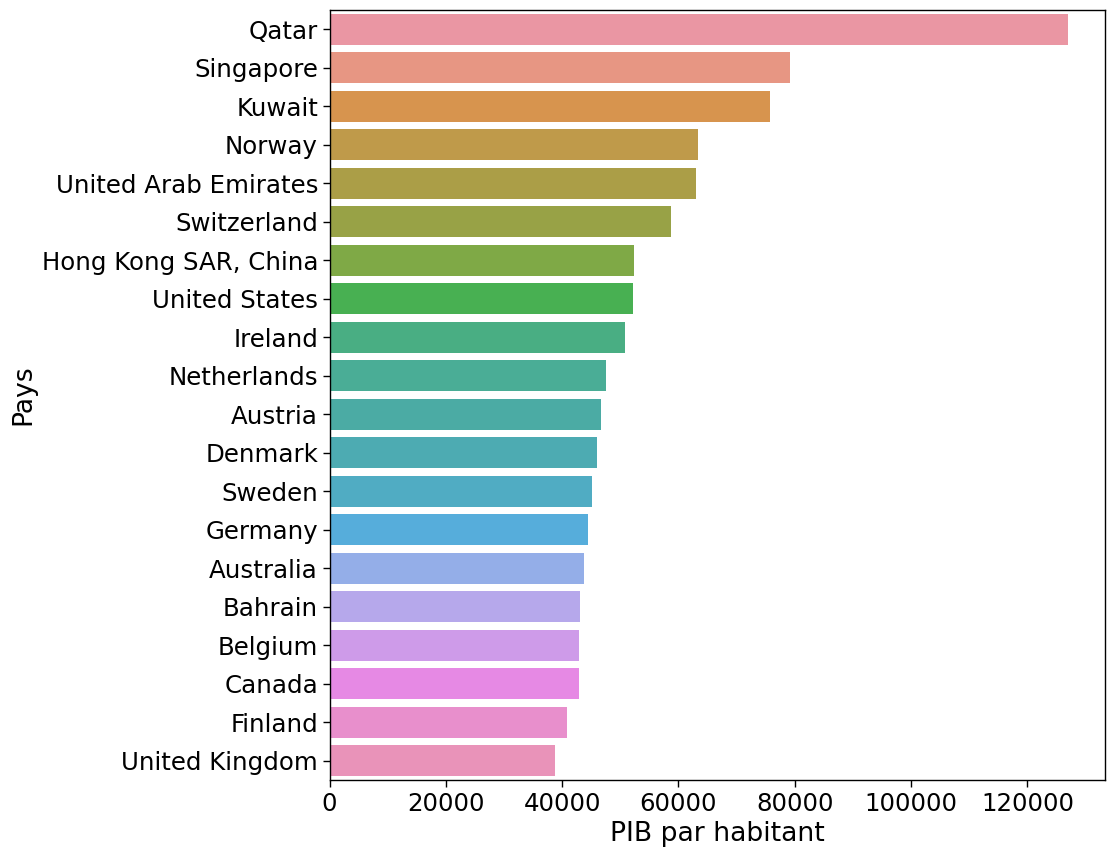

In [24]:
#Affichage du graphique
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = pib.sort_values(by='PIB par hab (PPA)', ascending=False)['PIB par hab (PPA)'].head(20), y=pib.sort_values(by='PIB par hab (PPA)', ascending=False)['Country Name'].head(20))
plt.title('', size=20)
plt.xlabel("PIB par habitant")
plt.ylabel('Pays')
plt.show()

La liste de pays obtenus a l'air raisonnable. Nous pouvons maintenant nous intéresser aux pays qui possèdent une population jeune suffisante pour effectuer notre sélection finale. 

### Sélection des 10 pays avec plus de potentiels clients agés entre 15 à 24 ans

In [45]:
# Tri en fonction de la population jeune
jeune=pib.sort_values(by='Population 15-24 ans', ascending=False).groupby('Population 15-24 ans').head(20)
jeune

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Country Name
Country Code,,,,,
USA,72.512277,52244.875533,4.524368e+07,0.750262,United States
DEU,83.928300,44352.986639,9.036869e+06,-0.043951,Germany
GBR,88.552399,38781.846678,7.904708e+06,0.746455,United Kingdom
CAN,84.615000,42853.695321,4.452427e+06,1.065479,Canada
AUS,81.083619,43696.685599,2.921038e+06,1.538463,Australia
NLD,92.057865,47515.330392,2.002537e+06,0.407879,Netherlands
BEL,81.592181,42936.627565,1.254599e+06,0.721587,Belgium
SWE,92.310629,45043.936854,1.191749e+06,0.874077,Sweden
AUT,79.915792,46669.133882,9.896772e+05,0.569168,Austria


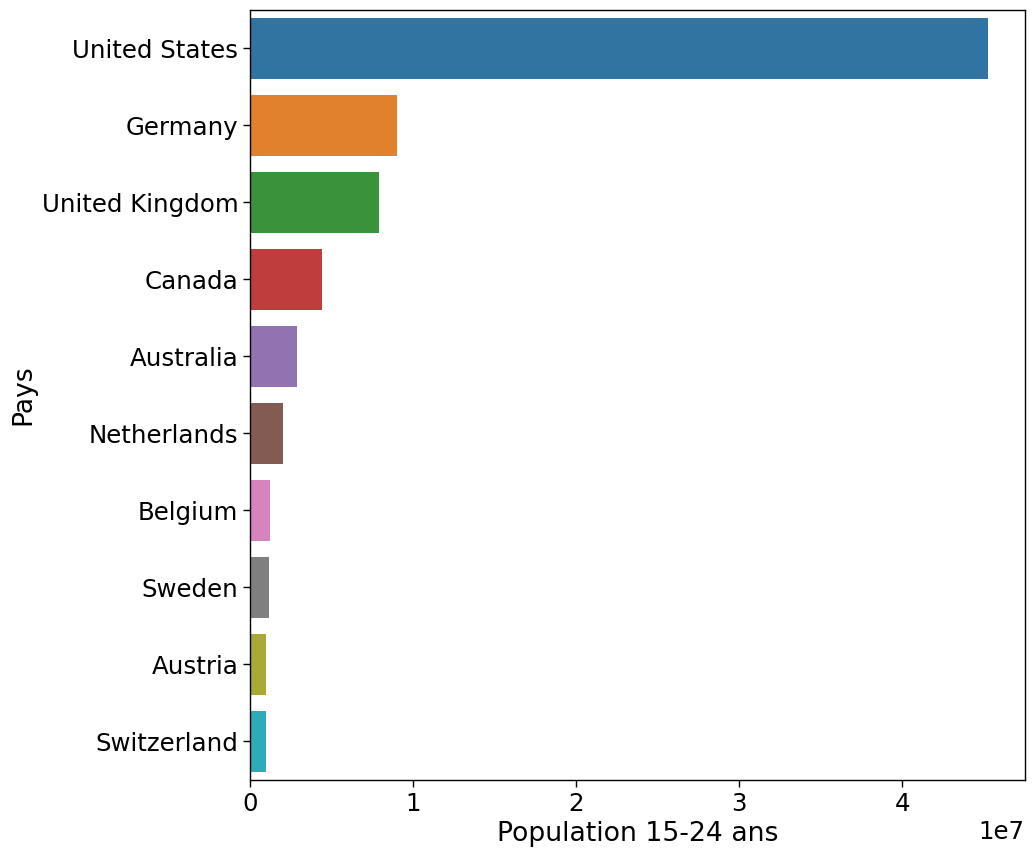

In [46]:
#Affichage du graphique
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = jeune.sort_values(by='Population 15-24 ans', ascending=False)['Population 15-24 ans'].head(10), y=jeune.sort_values(by='Population 15-24 ans', ascending=False)['Country Name'].head(10))
plt.title('', size=20)
plt.xlabel("Population 15-24 ans")
plt.ylabel('Pays')
plt.show()

Le pays qui semble le plus intéressant à investir est les États Unis. Les autres pays proposés dans le graphique ci-dessus comme L'Allemagne, l'Angleterre et le Canada possèdent également une très grande population de jeunes et forment de potentiels clients. 

On pourra maintenant étudier l'évolution des pays clients dans le futur en utilisant le critère de croissance de population.

# 4. Évolution des pays potentiels

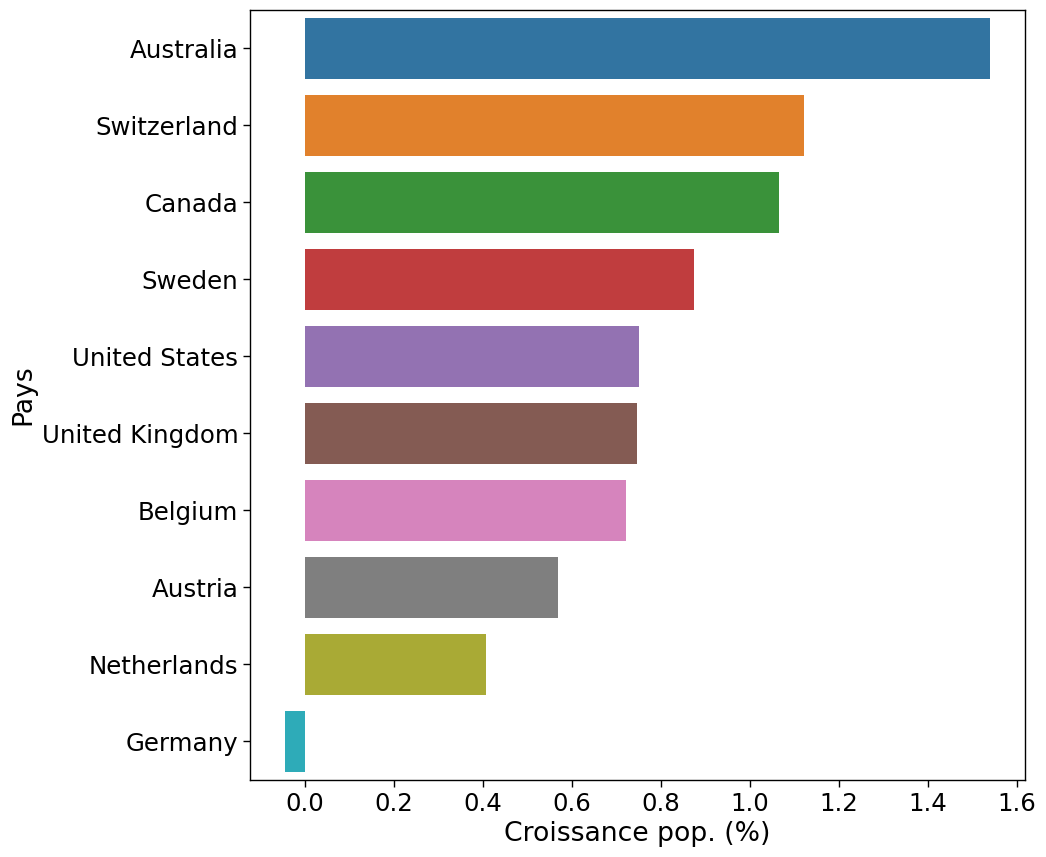

In [53]:
# Tri en fonction du taux de croissance de la population
jeune2=jeune.head(10)
croissance=jeune2.sort_values(by='Croissance pop. (%)', ascending=False).groupby('Croissance pop. (%)').head(10)
croissance

# Affichage du graphique
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = croissance.sort_values(by='Croissance pop. (%)', ascending=False)['Croissance pop. (%)'].head(10), y=croissance.sort_values(by='Croissance pop. (%)', ascending=False)['Country Name'].head(10))
plt.title('', size=20)
plt.xlabel("Croissance pop. (%)")
plt.ylabel('Pays')
plt.show()

Tous les pays proposés ont une croissance positive mise à part l'Allemagne. Suite à cette évolution, on proposera comme pays potentiels les pays suivants : 
-  États Unis
- Angleterre
- Canada
- Australie
- Pays-Bas
- Belgique
- Suède
- Autriche
- Suisse.


On peut réaliser une analyse secondaire en incluant les populations inscrites en secondaire et tertiaire et en combinant ces conditions avec l'analyse effectuée précèdemment. 

# 5. Méthode alternative :  Tri en fonction de la population jeune et des personnes en secondaire et universaires

In [54]:
#Fusion des deux colonnes en secondaire
fusion=final_indicateurs.copy()
fusion['Secondaire'] = fusion[["SP.SEC.TOTL.IN","SP.SEC.UTOT.IN"]].mean(axis=1)


# Création du nouveau tableau final de données
indicators_names_new = {
    'IT.NET.USER.P2': 'Utilisateurs Internet (%)', 
    'NY.GDP.PCAP.PP.CD': 'PIB par hab (PPA)', 
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SP.POP.GROW': 'Croissance pop. (%)',
    'Secondaire': 'Population inscrite en secondaire',
    'SP.TER.TOTL.IN' : 'Population inscrite en tertiaire',
    'Short Name': 'Country Name'
}

final_indicators_values_new = (fusion
                           .dropna(subset=["SP.POP.1524.TO.UN"])
                           .drop(columns=["SP.POP.TOTL", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN"], errors="ignore")
                           .merge(countries[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True)
                           .rename(columns=indicators_names_new))

fusion = indicators_names_new.keys()
final_indicators_values_new

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Population inscrite en tertiaire,Population inscrite en secondaire,Country Name
Country Code,,,,,,,
AFG,5.935758,1788.887940,6.679801e+06,3.103683,2.819768e+06,3.197125e+06,Afghanistan
AGO,7.316667,6239.908363,4.018651e+06,3.524201,2.168874e+06,2.387484e+06,Angola
ALB,54.868149,10623.779560,5.856280e+05,-0.268682,2.751482e+05,2.677698e+05,Albania
ARE,83.316665,63064.874408,7.128560e+05,2.956295,NaN,3.945106e+05,United Arab Emirates
ARG,57.407177,19647.406305,6.873357e+06,1.036686,3.444851e+06,3.109713e+06,Argentina
...,...,...,...,...,...,...,...
VNM,37.586667,5186.028936,1.777147e+07,1.067158,8.885882e+06,7.527743e+06,Vietnam
YEM,18.556152,3808.375398,5.688936e+06,2.638750,2.765840e+06,2.720640e+06,Yemen
ZAF,41.064853,12641.709688,9.899711e+06,1.507078,5.304702e+06,4.199411e+06,South Africa


La sélection des pays en fonction de l'utilisation d'internet et du pib s'effectue de la même manière qu'avant sauf qu'on gardera 30 pays pour le pib au lieu de 20. 

In [26]:
# Sélection en fonction de l'utilisation d'internet 
data_utilisateurs_internet_new=final_indicators_values_new.sort_values(by='Utilisateurs Internet (%)', ascending=False).groupby('Utilisateurs Internet (%)').head(40)
utilisateurs_internet_new=data_utilisateurs_internet_new.head(40)
utilisateurs_internet_new

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Population inscrite en tertiaire,Population inscrite en secondaire,Country Name
Country Code,,,,,,,
NOR,94.948943,63430.013962,6.395098e+05,1.198043,3.295390e+05,2.926450e+05,Norway
DNK,92.956704,45982.723744,6.943373e+05,0.477098,3.530002e+05,3.202438e+05,Denmark
SWE,92.310629,45043.936854,1.191749e+06,0.874077,6.587733e+05,5.184943e+05,Sweden
NLD,92.057865,47515.330392,2.002537e+06,0.407879,1.009194e+06,8.950597e+05,Netherlands
GBR,88.552399,38781.846678,7.904708e+06,0.746455,4.199750e+06,4.175044e+06,United Kingdom
FIN,88.324486,40868.442189,6.497598e+05,0.433422,3.345417e+05,2.893676e+05,Finland
CHE,85.918681,58732.674071,9.617555e+05,1.120596,4.907353e+05,4.957414e+05,Switzerland
KOR,85.584096,32395.241261,6.566453e+06,0.567261,3.440690e+06,2.928315e+06,Korea
CAN,84.615000,42853.695321,4.452427e+06,1.065479,2.349322e+06,1.946025e+06,Canada


In [27]:
#Tri en fonction du pib 
data_pib_new=utilisateurs_internet_new.sort_values(by='PIB par hab (PPA)', ascending=False).groupby('PIB par hab (PPA)').head(30)
pib_new=data_pib_new.head(30)
pib_new

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Population inscrite en tertiaire,Population inscrite en secondaire,Country Name
Country Code,,,,,,,
QAT,79.495804,126926.754675,1.233850e+05,7.410908,1.639578e+05,7.060550e+04,Qatar
SGP,75.490708,79212.835513,6.765193e+05,1.735708,NaN,NaN,Singapore
KWT,71.550390,75755.232197,4.506333e+05,5.562534,2.570238e+05,2.117448e+05,Kuwait
NOR,94.948943,63430.013962,6.395098e+05,1.198043,3.295390e+05,2.926450e+05,Norway
ARE,83.316665,63064.874408,7.128560e+05,2.956295,NaN,3.945106e+05,United Arab Emirates
CHE,85.918681,58732.674071,9.617555e+05,1.120596,4.907353e+05,4.957414e+05,Switzerland
HKG,76.019104,52425.180506,8.737838e+05,0.777300,4.451252e+05,3.696473e+05,"Hong Kong SAR, China"
USA,72.512277,52244.875533,4.524368e+07,0.750262,2.227000e+07,1.900810e+07,United States
IRL,76.620011,50769.115473,5.862387e+05,0.511897,2.803982e+05,1.900788e+05,Ireland


On va maintenant combiner les deux critères de population inscrite en secondaire et tertiaire avec le critère de sélection de population jeune pour obtenir 20 pays. 

In [28]:
data_final_jeune = pib_new.sort_values(['Population inscrite en secondaire', 'Population inscrite en tertiaire','Population 15-24 ans'],
              ascending = [False, False,False]).groupby('Population 15-24 ans').head(20)
jeune_final=data_final_jeune.head(20)
jeune_final

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Population inscrite en tertiaire,Population inscrite en secondaire,Country Name
Country Code,,,,,,,
USA,72.512277,52244.875533,4.524368e+07,0.750262,2.227000e+07,1.900810e+07,United States
JPN,84.190801,37834.903302,1.235106e+07,-0.118345,6.337456e+06,5.360998e+06,Japan
DEU,83.928300,44352.986639,9.036869e+06,-0.043951,4.606053e+06,4.819725e+06,Germany
GBR,88.552399,38781.846678,7.904708e+06,0.746455,4.199750e+06,4.175044e+06,United Kingdom
FRA,81.150716,38669.490488,7.582918e+06,0.486597,3.824831e+06,3.798052e+06,France
KOR,85.584096,32395.241261,6.566453e+06,0.567261,3.440690e+06,2.928315e+06,Korea
CAN,84.615000,42853.695321,4.452427e+06,1.065479,2.349322e+06,1.946025e+06,Canada
ESP,71.535767,32861.024454,4.416110e+06,0.030439,2.283668e+06,1.796530e+06,Spain
AUS,81.083619,43696.685599,2.921038e+06,1.538463,1.596559e+06,1.160063e+06,Australia


Finalement, on va fusionner les conditions de croisance de population et du fichier présentant les 20 premiers pays pour proposer les 10 premiers pays susceptibles de devenir des clients potentiels. 

In [29]:
data_final = jeune_final.sort_values(['Population 15-24 ans','Croissance pop. (%)'],
              ascending = [False, False]).groupby('Population 15-24 ans').head(10)
final=data_final.head(10)
final

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Population inscrite en tertiaire,Population inscrite en secondaire,Country Name
Country Code,,,,,,,
USA,72.512277,52244.875533,4.524368e+07,0.750262,2.227000e+07,1.900810e+07,United States
JPN,84.190801,37834.903302,1.235106e+07,-0.118345,6.337456e+06,5.360998e+06,Japan
DEU,83.928300,44352.986639,9.036869e+06,-0.043951,4.606053e+06,4.819725e+06,Germany
GBR,88.552399,38781.846678,7.904708e+06,0.746455,4.199750e+06,4.175044e+06,United Kingdom
FRA,81.150716,38669.490488,7.582918e+06,0.486597,3.824831e+06,3.798052e+06,France
KOR,85.584096,32395.241261,6.566453e+06,0.567261,3.440690e+06,2.928315e+06,Korea
CAN,84.615000,42853.695321,4.452427e+06,1.065479,2.349322e+06,1.946025e+06,Canada
ESP,71.535767,32861.024454,4.416110e+06,0.030439,2.283668e+06,1.796530e+06,Spain
AUS,81.083619,43696.685599,2.921038e+06,1.538463,1.596559e+06,1.160063e+06,Australia


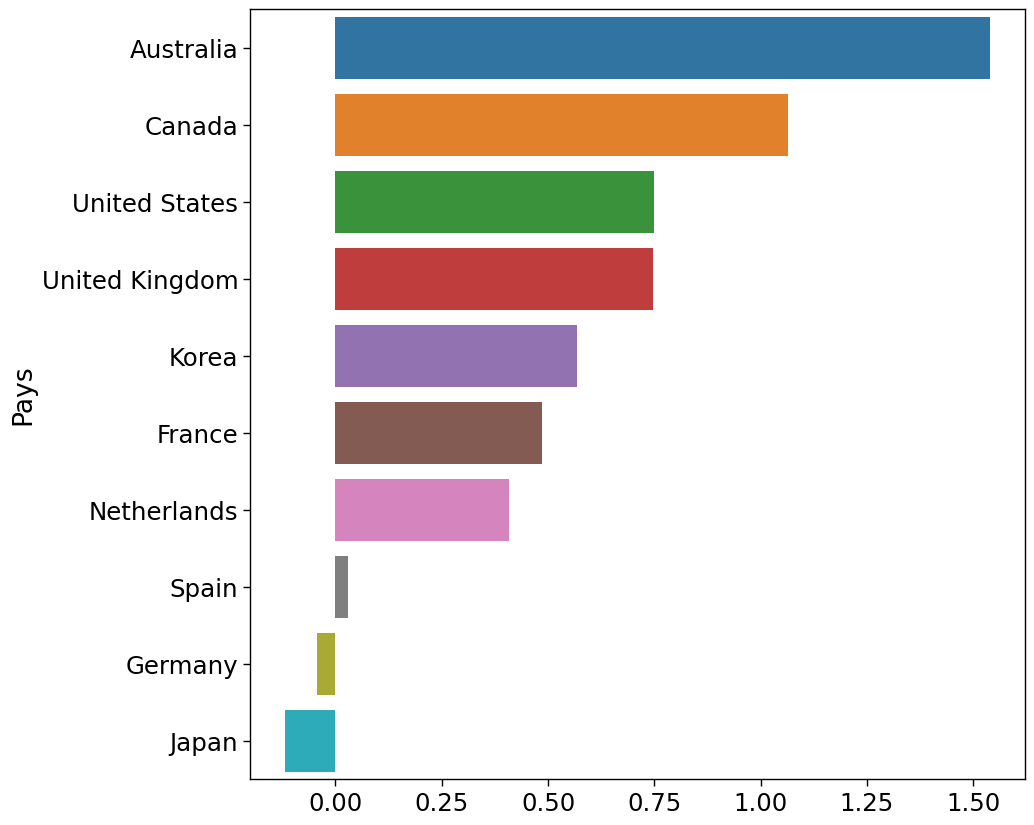

In [27]:
# Affichage du graphique
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = final.sort_values(by='Croissance pop. (%)', ascending=False)['Croissance pop. (%)'].head(10), y=final.sort_values(by='Croissance pop. (%)', ascending=False)['Country Name'].head(10))
plt.title('', size=20)
plt.xlabel("")
plt.ylabel('Pays')
plt.show()

On remarque qu'on obtient une meilleure sélection avec le premier tri. On retiendra donc les résultats obtenus avec le premier tri. 

# 6. Conclusion
**Le jeu de données permet-il de répondre aux attentes de Academy?**

Les sources sont fiables , la majorité des pays y sont présents. Il y a beaucoup d'indicateurs liés à l'éducation ou à des données qui sont utiles tels que la population totale et par tranches d'âgeet le PIB par habitant. 

Il est possible de mener une analyse exploratoire des données et aboutir à une sélection de 10 pays potentiels qui sont : 


Certains indicateurs sont inutisables et il y a beaucoup de données manquantes pour comparer. Il faudra compléter cette analyse avec d'autres sources de données.

Pour une analyse plus approfondie, il serait utile d'avoir d'autres indicateurs tels que la pénétration de l'éducation en ligna dans les paya le pourcentage de jeunes ayant recours à internet pour s'éduquer et les langues envisagées pour enseigner.

Finalement, il faudrait connaître les limites de l'entreprise comme les moyens d'investissement et la facilité de déploiement à l'étranger. 
